In [1]:
import sys
print(sys.executable)


/usr/bin/python


In [2]:
!pip list


Package                       Version
----------------------------- -------------
absl-py                       1.0.0
aiohttp                       3.9.5
aiosignal                     1.3.1
argon2-cffi                   23.1.0
argon2-cffi-bindings          21.2.0
asciitree                     0.3.3
asttokens                     2.4.1
astunparse                    1.6.3
async-timeout                 4.0.3
atex                          0.0.6
attrs                         23.2.0
beautifulsoup4                4.12.3
bleach                        6.1.0
cachetools                    5.3.3
certifi                       2024.2.2
cffi                          1.16.0
charset-normalizer            3.3.2
clang                         16.0.1.1
click                         8.1.7
cloudpickle                   3.0.0
comm                          0.2.2
contourpy                     1.2.1
cuda-python                   12.4.0
cudf                          24.4.0
cugraph                       24.4.0
cugr

In [3]:
!pip install --force-reinstall torchvision


Defaulting to user installation because normal site-packages is not writeable
  Using cached torchvision-0.22.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached numpy-2.2.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached torch-2.7.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (29 kB)
  Using cached pillow-11.2.1-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (8.9 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.6.77-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.6.77-py3-none-manylinux20

  Attempting uninstall: setuptools
    Found existing installation: setuptools 79.0.1
    Uninstalling setuptools-79.0.1:
      Successfully uninstalled setuptools-79.0.1
  Attempting uninstall: pillow
    Found existing installation: pillow 11.2.1
    Uninstalling pillow-11.2.1:
      Successfully uninstalled pillow-11.2.1
  Attempting uninstall: nvidia-nvtx-cu12
    Found existing installation: nvidia-nvtx-cu12 12.6.77
    Uninstalling nvidia-nvtx-cu12-12.6.77:
      Successfully uninstalled nvidia-nvtx-cu12-12.6.77
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.6.85
    Uninstalling nvidia-nvjitlink-cu12-12.6.85:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.6.85
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-cu12 2.26.2
    Uninstalling nvidia-nccl-cu12-2.26.2:
      Successfully uninstalled nvidia-nccl-cu12-2.26.2
  Attempting uninstall: nvidia-curand-cu12
    Found existing i

In [4]:
import torch
import torchvision

print("torch:", torch.__version__)
print("torchvision:", torchvision.__version__)


torch: 2.7.0+cu126
torchvision: 0.22.0+cu126


Using device: cuda
Epoch [1/5] | Loss: 1.1131 | Test Accuracy: 63.22%
✅ Best model saved at epoch 1 with accuracy 63.22%

Epoch [2/5] | Loss: 0.7989 | Test Accuracy: 64.60%
✅ Best model saved at epoch 2 with accuracy 64.60%

Epoch [3/5] | Loss: 0.5432 | Test Accuracy: 63.35%
No improvement.

Epoch [4/5] | Loss: 0.2814 | Test Accuracy: 64.11%
No improvement.

Epoch [5/5] | Loss: 0.1674 | Test Accuracy: 64.95%
✅ Best model saved at epoch 5 with accuracy 64.95%

Training complete.


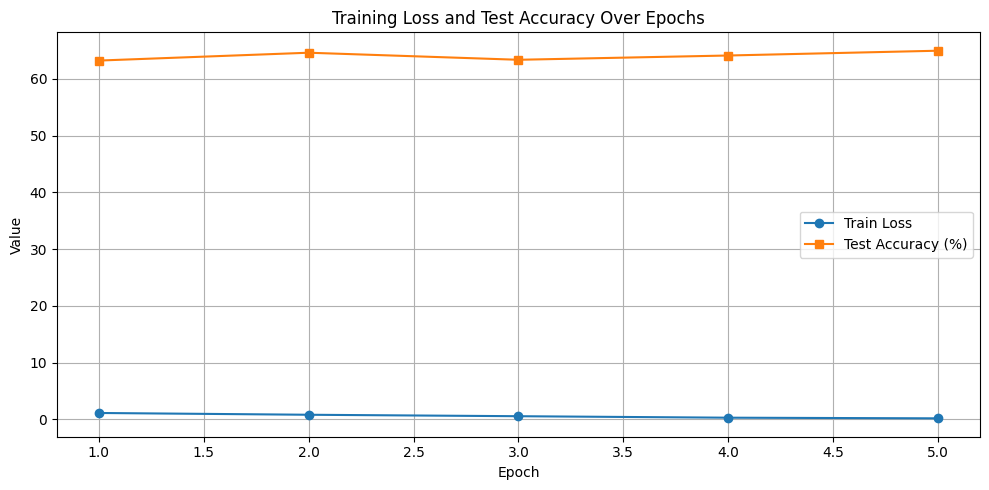

In [5]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Custom function to filter only valid image files
def is_image_file(filename):
    return filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp'))

# Safe ImageFolder that ignores hidden folders
class SafeImageFolder(datasets.ImageFolder):
    def find_classes(self, directory):
        classes = [d.name for d in os.scandir(directory) if d.is_dir() and not d.name.startswith('.')]
        classes.sort()
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx

# Image transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# Data paths
data_dir = "/home/mukhopadhyayd/Customer Sentiment/data/FER-2013"

# Load datasets
train_dataset = SafeImageFolder(
    root=os.path.join(data_dir, "train"),
    transform=transform,
    is_valid_file=is_image_file
)

test_dataset = SafeImageFolder(
    root=os.path.join(data_dir, "test"),
    transform=transform,
    is_valid_file=is_image_file
)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load and modify pretrained ResNet18
model = models.resnet18(weights="IMAGENET1K_V1")
model.fc = nn.Linear(model.fc.in_features, 7)  # 7 emotion classes
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training function
def train_model(model, train_loader, test_loader, epochs=5, checkpoint_path="best_model.pth"):
    train_losses = []
    test_accuracies = []
    best_accuracy = 0.0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validation
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        test_accuracies.append(accuracy)

        print(f"Epoch [{epoch+1}/{epochs}] | Loss: {avg_loss:.4f} | Test Accuracy: {accuracy:.2f}%")

        # Save best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), checkpoint_path)
            print(f"✅ Best model saved at epoch {epoch+1} with accuracy {accuracy:.2f}%\n")
        else:
            print("No improvement.\n")

    print("Training complete.")

    # Plotting loss and accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, epochs + 1), train_losses, label='Train Loss', marker='o')
    plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy (%)', marker='s')
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.title("Training Loss and Test Accuracy Over Epochs")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Start training
train_model(model, train_loader, test_loader, epochs=5)


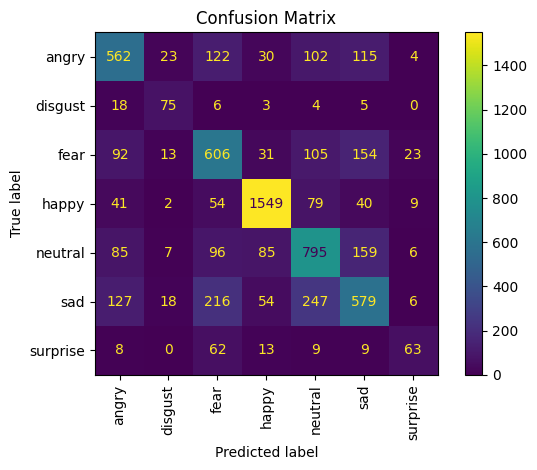

In [8]:
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())

    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_dataset.classes)
    disp.plot(xticks_rotation='vertical')
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

# After training, call this:
evaluate_model(model, test_loader)


In [11]:
def predict_image(image_path):
    model.eval()
    image = Image.open(image_path).convert("L")  # grayscale
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
    return train_dataset.classes[predicted.item()]

# Example Usage:
result = predict_image("/home/mukhopadhyayd/Customer Sentiment/data/FER-2013/test/happy/PublicTest_99626406.jpg")
print("Predicted emotion:", result)


Predicted emotion: happy
